In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')


**1. Data cleaning including missing values, outliers and multi-collinearity.**

# Data Understanding

In [2]:
df=pd.read_csv('Fraud.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [3]:
df.shape

(6362620, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [6]:
df.describe().round()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.0,6362620.0,6362620.0,6362620.0,6362620.0,6362620.0,6362620.0,6362620.0
mean,243.0,179862.0,833883.0,855114.0,1100702.0,1224996.0,0.0,0.0
std,142.0,603858.0,2888243.0,2924049.0,3399180.0,3674129.0,0.0,0.0
min,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,156.0,13390.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,239.0,74872.0,14208.0,0.0,132706.0,214661.0,0.0,0.0
75%,335.0,208721.0,107315.0,144258.0,943037.0,1111909.0,0.0,0.0
max,743.0,92445517.0,59585040.0,49585040.0,356015889.0,356179279.0,1.0,1.0


# Data Cleaning

Data cleaning including missing values, outliers and multi-collinearity

In [7]:
df[df.duplicated()]
#no duplicate values

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [8]:
df.isnull().sum()
# no null values

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [9]:
# checking for data anamolies
for i in df.select_dtypes('object').columns:
    print(df[i].value_counts())
    print('___________________________________________________________________________')

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64
___________________________________________________________________________
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: nameOrig, Length: 6353307, dtype: int64
___________________________________________________________________________
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: nameDest, Length: 2722362, dtype: int64
___________________________________________________________________________


In [10]:
df.dtypes
# there are no columns misintrepreted

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

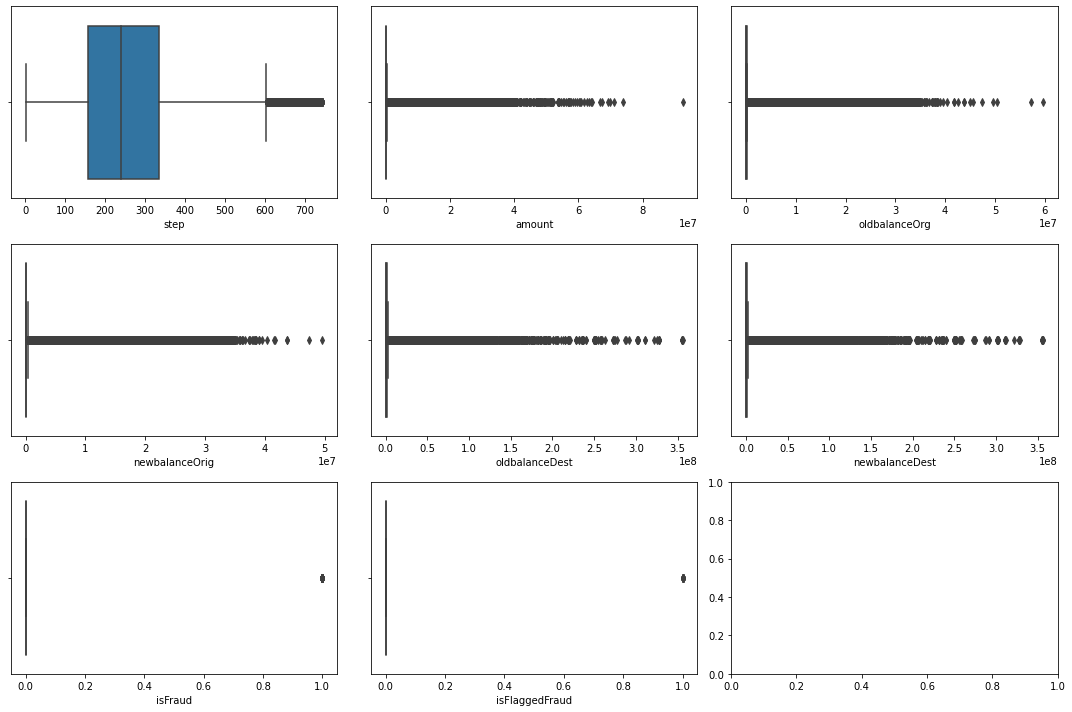

In [11]:
dfnum = df.select_dtypes(include=np.number)
fig,ax= plt.subplots(3,3,figsize=(15,10))
for i,subplots in zip(dfnum.columns ,ax.flatten()):
    sns.boxplot(dfnum[i],ax=subplots)
plt.tight_layout()
# there are outliers but it is not recommended to remove outlier

<AxesSubplot:>

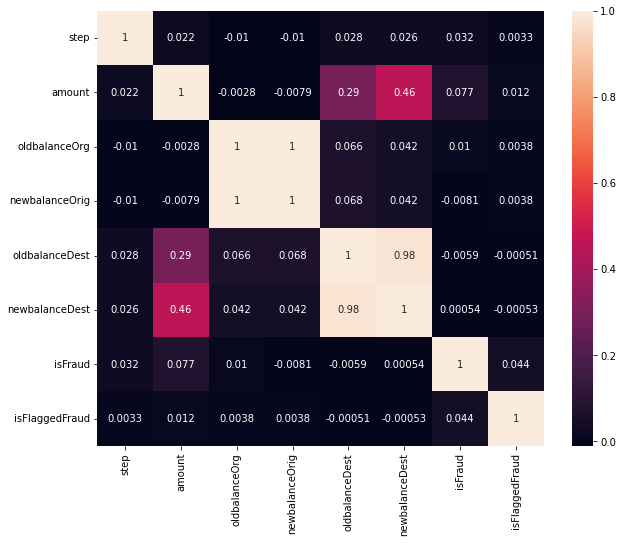

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [13]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [14]:
df_to_merchants=df[df.nameDest.str.contains('M')]
df_to_merchants

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362312,718,PAYMENT,8178.01,C1213413071,11742.0,3563.99,M1112540487,0.0,0.0,0,0
6362314,718,PAYMENT,17841.23,C1045048098,10182.0,0.00,M1878955882,0.0,0.0,0,0
6362316,718,PAYMENT,1022.91,C1203084509,12.0,0.00,M675916850,0.0,0.0,0,0
6362318,718,PAYMENT,4109.57,C673558958,5521.0,1411.43,M1126011651,0.0,0.0,0,0


In [15]:
df_to_merchants[['isFraud','isFlaggedFraud']].value_counts()

isFraud  isFlaggedFraud
0        0                 2151495
dtype: int64

We can see that when the transaction is to a merchant there is no chance that it can be **Fraud**  
- so for that we want to make the model understand that it is a transaction to a merchant so we will do some Feature Engineering to make this work

In [16]:
df.insert(loc=6,column='Destination_Account_Type',value=df.nameDest.transform(lambda x:'Merchant' if x[0]=='M' else "Customer"))

In [17]:
df.nameOrig.transform(lambda x:x[0]).value_counts()
# we can see that all the origin names are from th ecustomers and no origin account is of Merchant

C    6362620
Name: nameOrig, dtype: int64

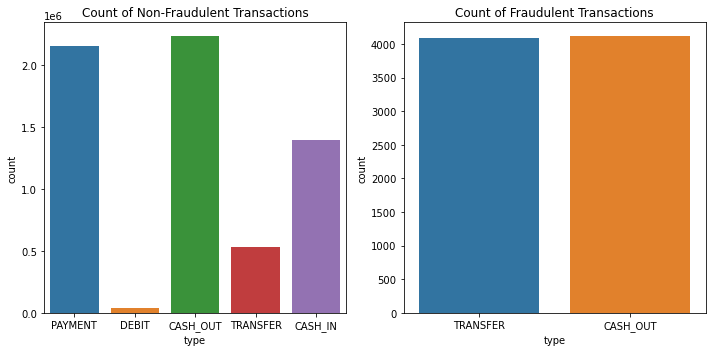

In [18]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.countplot(data=df[df.isFraud == 0], x='type', ax=ax[0])
ax[0].set_title('Count of Non-Fraudulent Transactions')
sns.countplot(data=df[df.isFraud == 1], x='type', ax=ax[1])
ax[1].set_title('Count of Fraudulent Transactions')
plt.tight_layout()
plt.show()

As we can See that only Transactions and Cash out has the Fraudelent Transactions

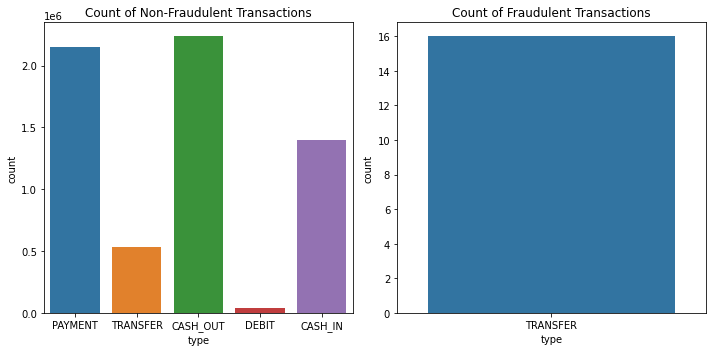

In [19]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.countplot(data=df[df.isFlaggedFraud == 0], x='type', ax=ax[0])
ax[0].set_title('Count of Non-Fraudulent Transactions')
sns.countplot(data=df[df.isFlaggedFraud == 1], x='type', ax=ax[1])
ax[1].set_title('Count of Fraudulent Transactions')
plt.tight_layout()
plt.show()

In [20]:
df.groupby('isFraud').isFlaggedFraud.value_counts().to_frame()
#we can see that only 16 transactions are flagged as fraud from 8200 Fraudelent transactions 
# so we can say that is FlaggedFraud Column isn't much useful in prediction so we can drop that 

isFlaggedFraud
isFraud isFlaggedFraud                
0       0                      6354407
1       0                         8197
        1                           16

In [21]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,Destination_Account_Type,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,Merchant,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,Merchant,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,Customer,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,Customer,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,Merchant,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,Customer,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,Customer,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,Customer,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,Customer,C2080388513,0.00,0.00,1,0


In [22]:
#removing first digit from account number so that numerical format can be passed into model as encoding those 
# many categorical variable and also checked if same number is for org and dest accounts and thats not the case and also 
#we can find merchant account by account type column
# df.nameDest=df.nameDest.transform(lambda x:x[1:])
# df.nameOrig=df.nameOrig.transform(lambda x:x[1:])
# df.nameOrig=df.nameOrig.astype('int')
# df.nameDest=df.nameDest.astype('int')

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
for i in range(df.select_dtypes(include=np.number).columns.size):
    print(df.select_dtypes(include=np.number).columns[i],variance_inflation_factor(df.select_dtypes(include=np.number).values,i))

step 1.1910935708661265
amount 4.078951905253224
oldbalanceOrg 544.0531028288063
newbalanceOrig 546.3460079624596
oldbalanceDest 72.89552215169822
newbalanceDest 84.58461924348019
isFraud 1.1883855017662883
isFlaggedFraud 1.0025461544077137


**2. Describe your fraud detection model in elaboration.**

- The fraud detection model uses historical transaction data and features like destination account type,transaction type, amount, balances, etc. 
- After preprocessing and feature engineering, the model is trained and evaluated on labeled data to identify patterns separating legitimate from fraudulent transactions.
- With a set threshold, the model is deployed for real-time monitoring, adapting to evolving fraud tactics through regular updates. 
- Its ability to flag suspicious activities aids in detecting potential fraud in the system.

**3. How did you select variables to be included in the model?**

variable to be included in the model are being built are selected through sattaistical test according to the dtype of variable

In [24]:
import scipy.stats as stats
for i in df.select_dtypes(include=np.number).columns:
    zstat,pv=stats.ttest_ind(df[df.isFraud==0][i],df[df.isFraud==1][i])
    print('column name: ',i,', P_value: ',pv, ', Significance level: 0.05 (5%)')
    if pv<0.05:
        print('Reject Null Hyp., conclude: the column is related/significant wrt column model')
        print('______________________________________________________________________________________________')
    else:
        print('Fail to reject Null Hyp., conclude: the column is not related to column model') 
        print('______________________________________________________________________________________________')

column name:  step , P_value:  0.0 , Significance level: 0.05 (5%)
Reject Null Hyp., conclude: the column is related/significant wrt column model
______________________________________________________________________________________________
column name:  amount , P_value:  0.0 , Significance level: 0.05 (5%)
Reject Null Hyp., conclude: the column is related/significant wrt column model
______________________________________________________________________________________________
column name:  oldbalanceOrg , P_value:  1.0542893553023227e-144 , Significance level: 0.05 (5%)
Reject Null Hyp., conclude: the column is related/significant wrt column model
______________________________________________________________________________________________
column name:  newbalanceOrig , P_value:  7.168312431103147e-94 , Significance level: 0.05 (5%)
Reject Null Hyp., conclude: the column is related/significant wrt column model
________________________________________________________________________

In [25]:
import scipy.stats as stats
for i in df.select_dtypes(exclude=np.number).drop(columns=['nameOrig','nameDest']).columns:
    c=pd.crosstab(df[i],df.isFraud)
    z,pv,dof,ar=stats.chi2_contingency(c)
    print('column name: ',i,', P_value: ',pv, ', Significance level: 0.05 (5%)')
    if pv<0.05:
        print('Reject Null Hyp., conclude: the column is related/significant wrt column model')
        print('______________________________________________________________________________________________')
    else:
        print('Fail to reject Null Hyp., conclude: the column is not related to column model') 
        print('______________________________________________________________________________________________')

column name:  type , P_value:  0.0 , Significance level: 0.05 (5%)
Reject Null Hyp., conclude: the column is related/significant wrt column model
______________________________________________________________________________________________
column name:  Destination_Account_Type , P_value:  0.0 , Significance level: 0.05 (5%)
Reject Null Hyp., conclude: the column is related/significant wrt column model
______________________________________________________________________________________________


**4. Demonstrate the performance of the model by using best set of tools.**

The Best tool /metric to demostrate the model performance is:
- our target variable is of classification 
- our focus should be on the false negative prediction which means the tx is fraud but it is predicted as legit this type of transaction causes much damage
- we need to increase the **Recall Positive** to find the best model
- after recall we should be focusing on **F1 - score** 

In [26]:
# we can say that there is no significance in keeping account number so we can drop them 

In [27]:
df.drop(columns=['nameDest','nameOrig'],axis=1,inplace=True)

In [28]:
df=pd.concat([pd.get_dummies(df.select_dtypes(include='object'),drop_first=True),df.select_dtypes('number')],axis=1)

In [29]:
x=df.drop('isFraud',axis=1)
y=df.isFraud

In [30]:
df.isFraud.value_counts()/len(df)*100

0    99.870918
1     0.129082
Name: isFraud, dtype: float64

We can see there is a lot of imbalance in the target variable so we need to upsample the data using SMOTE analysis

In [51]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.85,stratify=y,random_state=9)
from imblearn.over_sampling import SMOTE
sm=SMOTE(sampling_strategy=0.1)
xtrain,ytrain=sm.fit_resample(xtrain,ytrain)

In [52]:
ytrain.value_counts()

0    5401246
1     540124
Name: isFraud, dtype: int64

In [53]:
from sklearn.linear_model import LogisticRegression
m1=LogisticRegression()
m1.fit(xtrain,ytrain)
print('Training data report')
print(classification_report(ytrain,m1.predict(xtrain)))
print(confusion_matrix(ytrain,m1.predict(xtrain)))
print()
print('Test data report')
print(classification_report(ytest,m1.predict(xtest)))
print(confusion_matrix(ytest,m1.predict(xtest)))

Training data report
              precision    recall  f1-score   support

           0       0.97      0.98      0.98   5401246
           1       0.81      0.73      0.77    540124

    accuracy                           0.96   5941370
   macro avg       0.89      0.86      0.87   5941370
weighted avg       0.96      0.96      0.96   5941370

[[5310441   90805]
 [ 147020  393104]]

Test data report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    953161
           1       0.05      0.73      0.10      1232

    accuracy                           0.98    954393
   macro avg       0.53      0.85      0.54    954393
weighted avg       1.00      0.98      0.99    954393

[[937056  16105]
 [   338    894]]


In [54]:
m1=DecisionTreeClassifier()
m1.fit(xtrain,ytrain)
print('Training data report')
print(classification_report(ytrain,m1.predict(xtrain)))
print(confusion_matrix(ytrain,m1.predict(xtrain)))
print()
print('Test data report')
print(classification_report(ytest,m1.predict(xtest)))
print(confusion_matrix(ytest,m1.predict(xtest)))
pd.DataFrame(m1.feature_importances_,index=xtrain.columns,columns=['Feature_IMP']).sort_values('Feature_IMP',ascending=False)

Training data report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   5401246
           1       1.00      1.00      1.00    540124

    accuracy                           1.00   5941370
   macro avg       1.00      1.00      1.00   5941370
weighted avg       1.00      1.00      1.00   5941370

[[5401246       0]
 [      0  540124]]

Test data report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    953161
           1       0.75      0.97      0.85      1232

    accuracy                           1.00    954393
   macro avg       0.88      0.99      0.92    954393
weighted avg       1.00      1.00      1.00    954393

[[952764    397]
 [    34   1198]]


,Feature_IMP
oldbalanceOrg,0.316530
amount,0.270067
newbalanceDest,0.205179
type_TRANSFER,0.088361
newbalanceOrig,0.059043
type_CASH_OUT,0.033232
step,0.022007
oldbalanceDest,0.003138
type_DEBIT,0.001597
type_PAYMENT,0.000567


**What are the key factors that predict fraudulent customer?**

<BarContainer object of 12 artists>

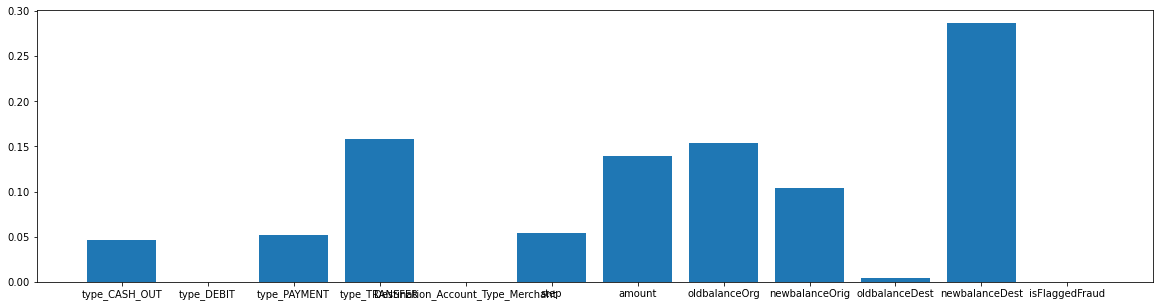

In [88]:
plt.figure(figsize=(20,5))
plt.bar(xtrain.columns,m1.feature_importances_)

**6.Do these factors make sense? If yes, How? If not, How not?**

- yes, As each and every factor helps in increasing the predication probability
- lets take an example old balance Orig has some amount of gini gain which low uncertenatity and low info so that it is a good predictor of target variable

In [93]:
from sklearn.ensemble import RandomForestClassifier
m1=RandomForestClassifier(n_estimators=10)
m1.fit(xtrain,ytrain)
print('Training data report')
print(classification_report(ytrain,m1.predict(xtrain)))
print(confusion_matrix(ytrain,m1.predict(xtrain)))
print()
print('Test data report')
print(classification_report(ytest,m1.predict(xtest)))
print(confusion_matrix(ytest,m1.predict(xtest)))
pd.DataFrame(m1.feature_importances_,index=xtrain.columns,columns=['Feature_IMP']).sort_values('Feature_IMP',ascending=False)

Training data report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   5401246
           1       1.00      1.00      1.00    540124

    accuracy                           1.00   5941370
   macro avg       1.00      1.00      1.00   5941370
weighted avg       1.00      1.00      1.00   5941370

[[5401229      17]
 [     22  540102]]

Test data report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    953161
           1       0.72      0.93      0.81      1232

    accuracy                           1.00    954393
   macro avg       0.86      0.96      0.90    954393
weighted avg       1.00      1.00      1.00    954393

[[952711    450]
 [    91   1141]]


,Feature_IMP
oldbalanceOrg,0.278897
amount,0.215614
newbalanceOrig,0.134371
newbalanceDest,0.121067
step,0.070641
type_TRANSFER,0.065434
oldbalanceDest,0.062826
type_CASH_OUT,0.020016
type_PAYMENT,0.017338
Destination_Account_Type_Merchant,0.013062


In [89]:
from xgboost import XGBClassifier
m1=XGBClassifier()
m1.fit(xtrain,ytrain)
print('Training data report')
print(classification_report(ytrain,m1.predict(xtrain)))
print(confusion_matrix(ytrain,m1.predict(xtrain)))
print()
print('Test data report')
print(classification_report(ytest,m1.predict(xtest)))
print(confusion_matrix(ytest,m1.predict(xtest)))

Training data report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   5401246
           1       0.99      1.00      1.00    540124

    accuracy                           1.00   5941370
   macro avg       1.00      1.00      1.00   5941370
weighted avg       1.00      1.00      1.00   5941370

[[5397110    4136]
 [    768  539356]]

Test data report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    953161
           1       0.60      0.99      0.75      1232

    accuracy                           1.00    954393
   macro avg       0.80      1.00      0.87    954393
weighted avg       1.00      1.00      1.00    954393

[[952343    818]
 [     9   1223]]


**7. What kind of prevention should be adopted while company update its infrastructure?**

- Verify data Contengincy,Quality during infrastructure updates.
- Consider retraining the fraud detection model after significant changes.
- Continuously monitor the model's performance with key metrics.
- Implement data quality processes to address anomalies frequently.
- Optimize model inference speed for real-time processing using parallel computing,etc...
- Needed **human expertise for investigating flagged cases**.
- Assigning Compliance Team for data protection and privacy regulations.
- Implement  backup and recovery mechanisms.
- Thoroughly test and validate the updated infrastructure and model.
- Communicate updates to Custtomers .

***8. Assuming these actions have been implemented, how would you determine if they work?**

- Monitor key **performance metrics** to assess the model's effectiveness in fraud detection.

- Validate data quality and consistency to ensure it meets expected standards and doesn't introduce biases/errors.

- Continuously **monitor model's behavior** in the live environment to detect any issues or unexpected behavior.

- Implement **Hypothesis / A/B testing** to compare the model's performance before and after updates to measure the impact of changes.

- Gather **feedback** from fraud analysts, users, and customers to understand their experiences and identify areas of improvement.

- Analyze past fraud cases and incidents to evaluate the model's detection accuracy and identify potential weaknesses.

